## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

In [2]:
# Checking the number of mice in the DataFrame.
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
average_volume = pd.DataFrame(df.groupby(['Mouse ID', 'Timepoint']).mean()['Tumor Volume (mm3)'])
volume_sem = pd.DataFrame(df.groupby(['Mouse ID', 'Timepoint']).sem()['Tumor Volume (mm3)'])


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop_duplicates()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice in the clean DataFrame.
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#get mean, median, var, std, sem

#mm3 is tumor volume 

mean = df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median = df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

variance = df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

standard_deviation = df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

sem = df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


# This method is the most straighforward, creating multiple series and putting them all together at the end.

data = {"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem}

summary_table = pd.DataFrame(data)

#print summary table

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

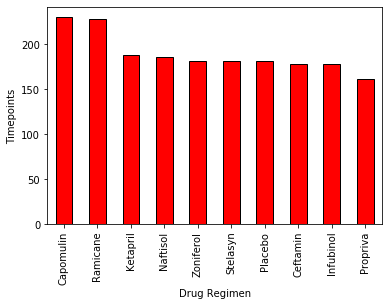

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

counts = df['Drug Regimen'].value_counts()

#get bar graph

counts.plot(kind="bar", color="red", edgecolor="black")

# x= "drug regimen"

plt.xlabel("Drug Regimen")

# y= "data points"

plt.ylabel("Timepoints")

#show bar graph

plt.show()


## Pie Plots

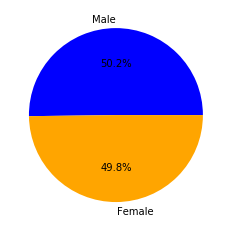

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#get gender count of male and female

counts = mouse_metadata.Sex.value_counts()

colors = ['blue', 'orange']

plt.pie(counts.values, colors=colors, labels=["Male", "Female"], autopct='%1.1f%%')

#show graph

plt.show()


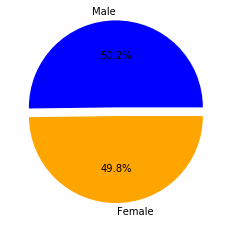

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]

# size 50.20%, 49.80%

sizes = [50.2,49.8]

colors = ['blue', 'orange']

explode = (0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")

plt.show()



## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin",:]

ramicane_df = df.loc[df["Drug Regimen"] == "Ramicane", :]

infubinol_df = df.loc[df["Drug Regimen"] == "Infubinol", :]

ceftamin_df = df.loc[df["Drug Regimen"] == "Ceftamin", :]

capomulin_df.head()

#return drug regimen and tumor volume using loc function

capomulin = capomulin_df.groupby('Mouse ID').max()['Timepoint']

capomulinvolume = pd.DataFrame(capomulin)

capomulinmerge = pd.merge(capomulinvolume, df, on=("Mouse ID","Timepoint"),how="outer")

capomulinmerge.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


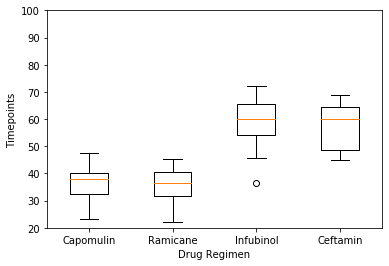

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimen_data = df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

regimen_data.head()

#get top 4 drug regimens, define and print

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#reset index from main dataframe

main_df = regimen_data.reset_index()

tumorlists = main_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

tumorlist_df = pd.DataFrame(tumorlists)

tumorlist_df = tumorlist_df.reindex(top_4)

tumorvolume = [vol for vol in tumorlist_df['Tumor Volume (mm3)']]

#plot box plot graph
plt.boxplot(tumorvolume, labels=top_4)

#set axis limits

plt.ylim(20, 100)

plt.xlabel("Drug Regimen")

# y= "data points"

plt.ylabel("Timepoints")

#show
plt.show()

## Line and Scatter Plots

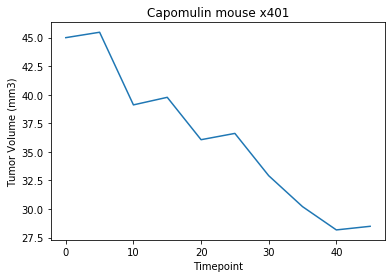

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#timepoint vs tumor volume

#get line plot regimen, mouse id

def get_line_plot(regimen, mouse_id):
    
    regimen_data = df.loc[df["Drug Regimen"] == regimen]
    
    data = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    
    plt.plot(data['Timepoint'], data['Tumor Volume (mm3)'])
    
    plt.xlabel('Timepoint')
    
    plt.ylabel('Tumor Volume (mm3)')
    
    plt.title(regimen + " mouse " + mouse_id)
    
    plt.show()
    
    #"x401","Capomulin","Female",16,15
    
get_line_plot("Capomulin", "x401")


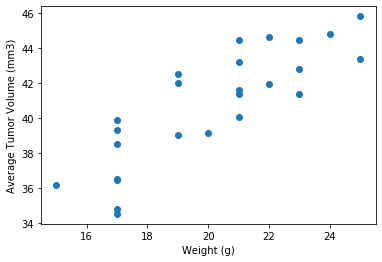

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

def generate_scatter_plot(regimen):
    
    regimen_data = df.loc[df['Drug Regimen'] == regimen]
    
    averages = regimen_data.groupby(['Mouse ID']).mean()
    
    plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
    
    #weight in grams (g)
    
    plt.xlabel('Weight (g)')
    
    plt.ylabel('Average Tumor Volume (mm3)')
    
    plt.show()
    
    return averages

averages = generate_scatter_plot("Capomulin")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#weight in grams


#pull weight and volume of mice

#im stuck on this part. cant figure this out.

#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values

#regress_values

#print(regress_values)



